Name : Pal Pokharna

PRN no. : 1032210766

Batch : A2

**Task 1:**  Perform Erosion on Fig such that all balls get separated from each other. Optional (you can further apply your connected component analysis algorithm to count total number of balls present in this image)

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.io import imread
from skimage.io import imshow

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


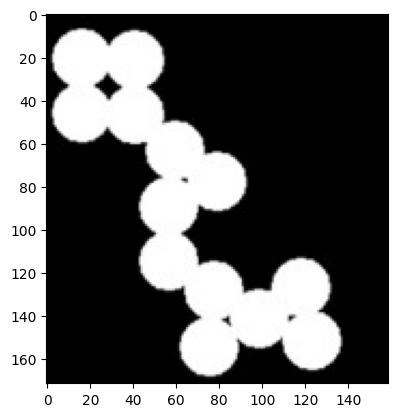

In [ ]:
img1=cv2.imread('/content/balls.jpg')
print(img1)
plt.imshow(img1)

In [ ]:
ret, mask=cv2.threshold(img1, 100, 255, cv2.THRESH_BINARY)
kernal=np.ones((5,5), np.uint8)
# cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))

Text(0.5, 1.0, 'Dilated Image')

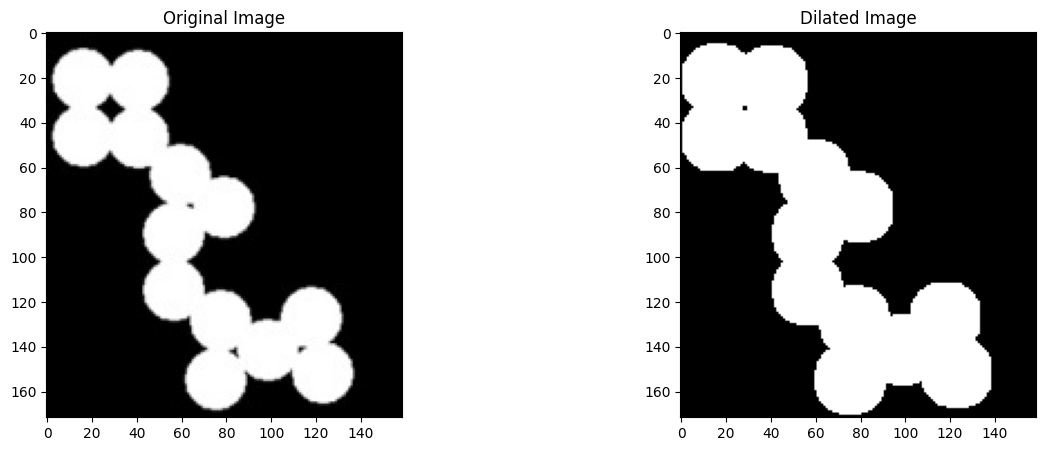

In [ ]:
dilation=cv2.dilate(mask, kernal, iterations=1)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB))
plt.title('Dilated Image')

Text(0.5, 1.0, 'Eroded Image')

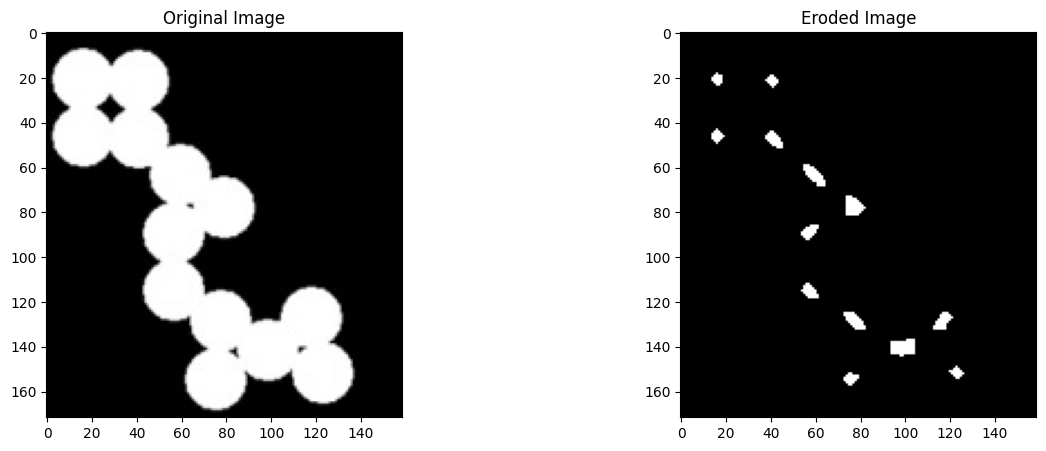

In [ ]:
erosion=cv2.erode(mask, kernal, iterations=4)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB))
plt.title('Eroded Image')

Text(0.5, 1.0, 'Dilation of Eroded Image')

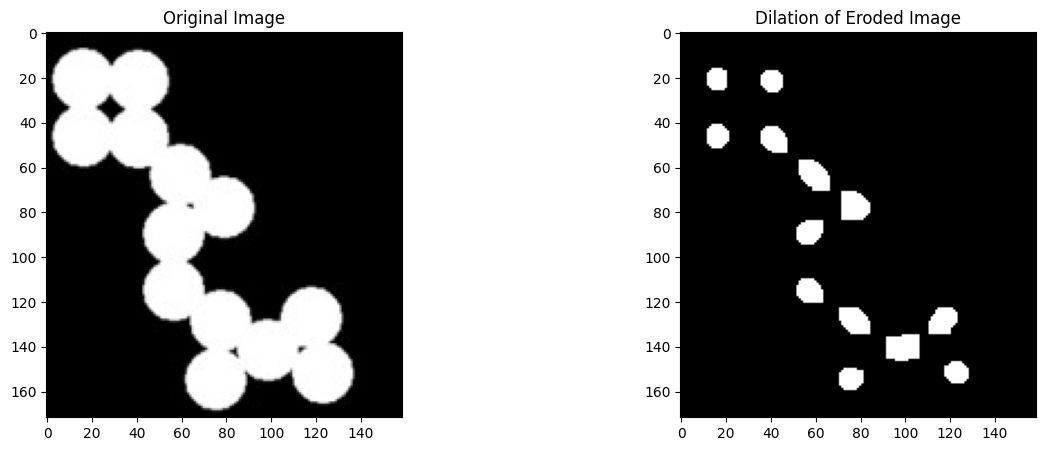

In [ ]:
#Erode-> dilate to get square shape
# closing=cv2.morphologyEx(erosion, cv2.MORPH_CLOSE, kernal)
dilation2=cv2.dilate(erosion, kernal, iterations=1)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dilation2, cv2.COLOR_BGR2RGB))
plt.title('Dilation of Eroded Image')

Text(0.5, 1.0, 'Opened Image')

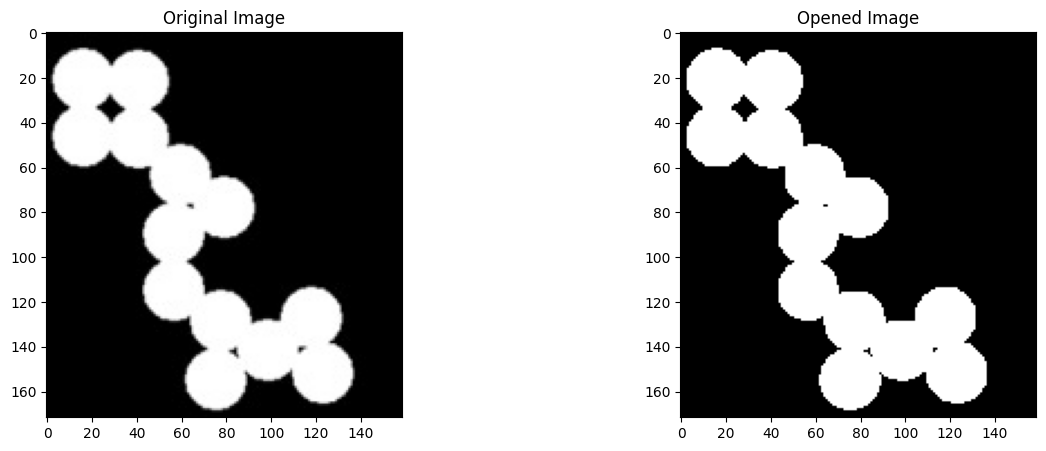

In [ ]:
opening=cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernal)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
plt.title('Opened Image')

Text(0.5, 1.0, 'Closed Image')

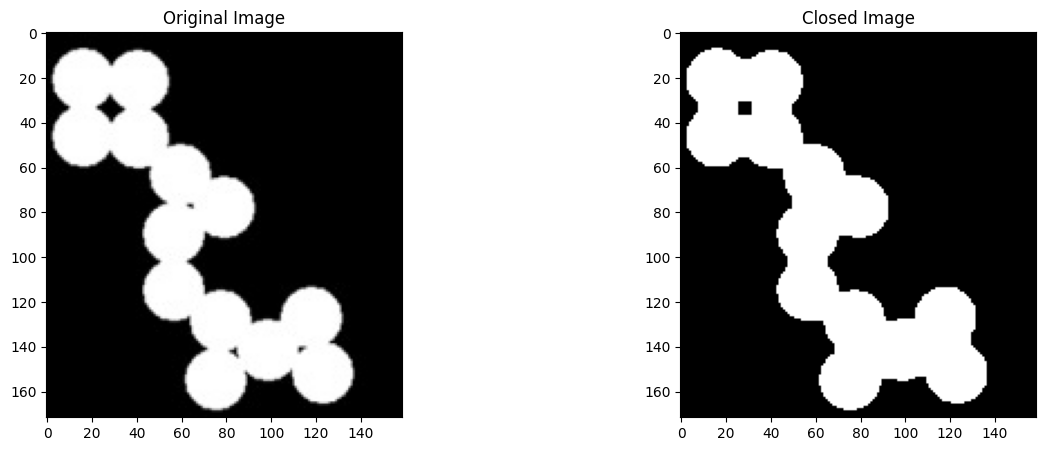

In [ ]:
closing=cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernal)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(closing, cv2.COLOR_BGR2RGB))
plt.title('Closed Image')

Text(0.5, 1.0, 'Gradient Image')

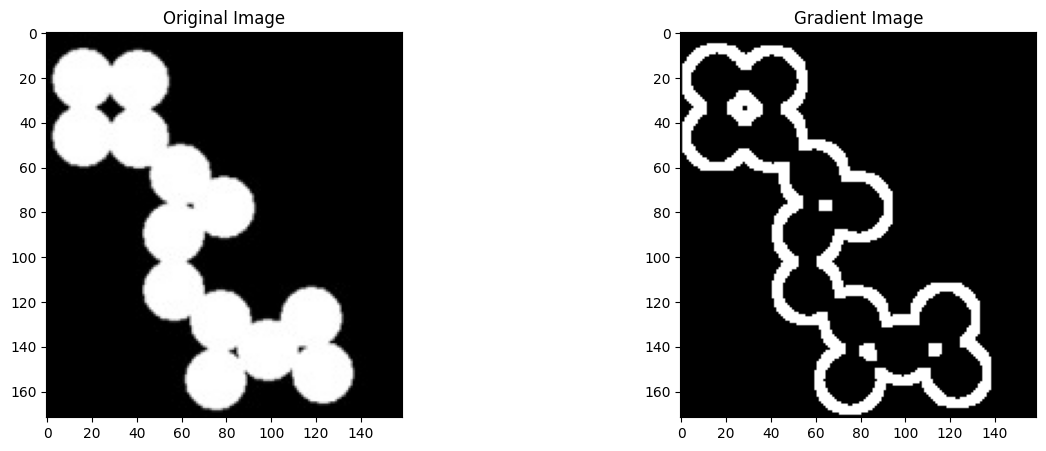

In [ ]:
mg=cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernal)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(mg, cv2.COLOR_BGR2RGB))
plt.title('Gradient Image')

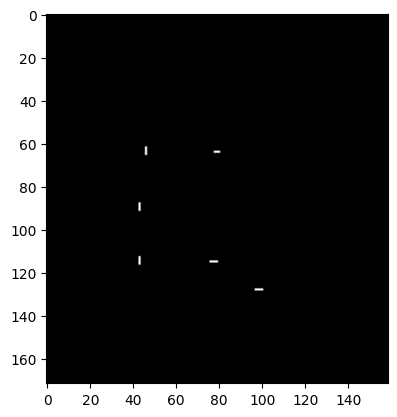

In [ ]:
th=mg=cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernal)
plt.imshow(th)

**Task 2**  : Remove the noise from Fig 2 and then fill the holes or gap between thumb impression. You can apply morphological closing and opening.

Text(0.5, 1.0, 'Closed')

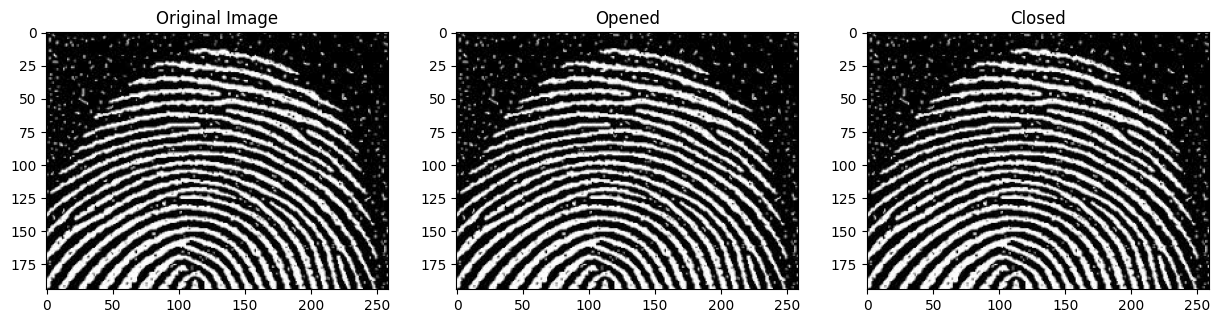

In [3]:
img2=cv2.imread('fin.jpg')

ret, mask=cv2.threshold(img2, 50, 255, cv2.THRESH_BINARY)
kernal=np.ones((1,1), np.uint8)

opening2=cv2.morphologyEx(img2, cv2.MORPH_OPEN, kernal)
closing2=cv2.morphologyEx(opening2, cv2.MORPH_OPEN, kernal)

#Plotting the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(opening2, cv2.COLOR_BGR2RGB))
plt.title('Opened')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(closing2, cv2.COLOR_BGR2RGB))
plt.title('Closed')

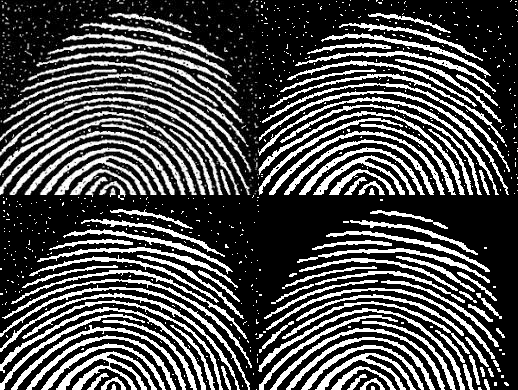

In [15]:
# Load the image
img = cv2.imread('fin.jpg', 0)  # Read as grayscale

# Apply thresholding to create a binary image
ret, thresh_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Perform morphological closing to connect broken ridges and fill small gaps
kernel = np.ones((2, 2), np.uint8)  # Structuring element similar to ridge width
closed_img = cv2.morphologyEx(thresh_img, cv2.MORPH_CLOSE, kernel)

# Apply morphological opening to remove small protrusions or noise pixels
smaller_kernel = np.ones((2, 3), np.uint8)  # Smaller kernel for minimum gap size
opened_img = cv2.morphologyEx(closed_img, cv2.MORPH_OPEN, smaller_kernel)

# Visualize the results

h1=np.hstack([img,thresh_img])
h2=np.hstack([closed_img,opened_img])
v=np.vstack([h1,h2])
cv2_imshow(v)

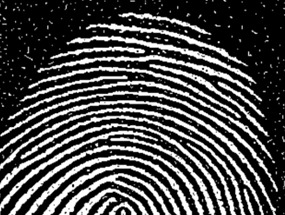

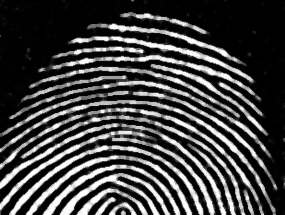

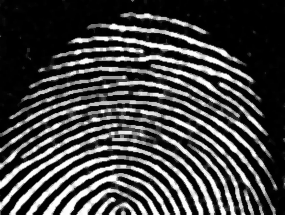

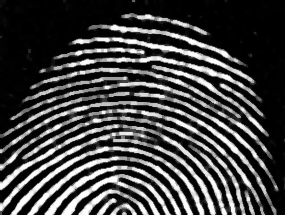

In [ ]:
#using Median Blur
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image (replace 'fingerprint.jpg' with your actual file name)
img = cv2.imread('/content/Fingerprint.jpg', 0)  # Read as grayscale

# Apply median filtering to reduce salt-and-pepper noise
denoised_img = cv2.medianBlur(img, 5)

# Perform morphological closing to connect broken ridges and fill small gaps
kernel = np.ones((3, 3), np.uint8)  # Structuring element similar to ridge width
closed_img = cv2.morphologyEx(denoised_img, cv2.MORPH_CLOSE, kernel)

# Apply morphological opening to remove small protrusions or noise pixels
smaller_kernel = np.ones((2, 2), np.uint8)  # Smaller kernel for minimum gap size
opened_img = cv2.morphologyEx(closed_img, cv2.MORPH_OPEN, smaller_kernel)

# Display the results
cv2_imshow(img)
cv2_imshow(denoised_img)
cv2_imshow(closed_img)
cv2_imshow(opened_img)

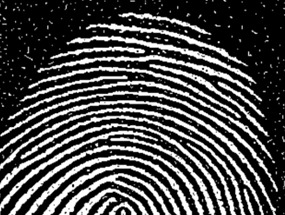

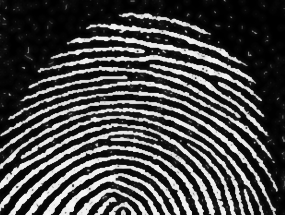

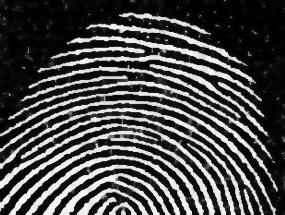

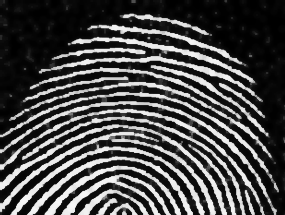

In [ ]:
#using bilaterial Blur instead of median blur to avoid excess blurring
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image (replace 'fingerprint.jpg' with your actual file name)
img = cv2.imread('/content/Fingerprint.jpg', 0)  # Read as grayscale

# Apply bilateral filtering to reduce noise while preserving edges
denoised_img = cv2.bilateralFilter(img, 9, 75, 75)

# Perform morphological closing to connect broken ridges and fill small gaps
kernel = np.ones((3, 3), np.uint8)  # Structuring element similar to ridge width
closed_img = cv2.morphologyEx(denoised_img, cv2.MORPH_CLOSE, kernel)

# Apply morphological opening to remove small protrusions or noise pixels
smaller_kernel = np.ones((2, 2), np.uint8)  # Smaller kernel for minimum gap size
opened_img = cv2.morphologyEx(closed_img, cv2.MORPH_OPEN, smaller_kernel)

# Display the results
cv2_imshow(img)
cv2_imshow(denoised_img)
cv2_imshow(closed_img)
cv2_imshow(opened_img)

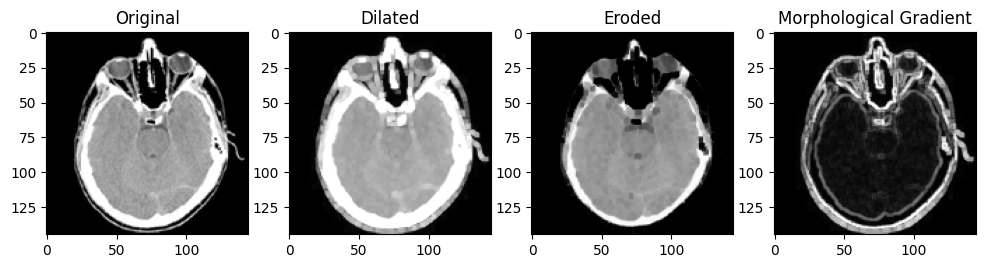

In [19]:
# Part 3

import cv2
import numpy as np
from skimage import morphology
from matplotlib import pyplot as plt

# Load your CT Scan image
image = cv2.imread('ct1.jpg', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Could not load image.")
    exit()

# 3x3 structuring element
structuring_element = np.ones((3, 3), dtype=np.uint8)  # You can change the shape if needed

# Dilation
dilated_image = cv2.dilate(image, structuring_element)

# Erosion
eroded_image = cv2.erode(image, structuring_element)

# Morphological Gradient (Method 1)
gradient_image = dilated_image - eroded_image

# Or, Morphological Gradient (Method 2)
# gradient_image = morphology.dilation(image, structuring_element) - morphology.erosion(image, structuring_element)

# Display original, dilated, eroded, and gradient images
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(1, 4, 2), plt.imshow(dilated_image, cmap='gray'), plt.title('Dilated')
plt.subplot(1, 4, 3), plt.imshow(eroded_image, cmap='gray'), plt.title('Eroded')
plt.subplot(1, 4, 4), plt.imshow(gradient_image, cmap='gray'), plt.title('Morphological Gradient')

plt.show()